# Skills Assessment - Nelson Valdivieso

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
file = '/Users/nelsonvaldivieso/Desktop/RiskSpanSkillsAssessment modified.xlsx'
f = pd.read_excel(file, sheet_name='Data')

In [3]:
f.head()

,LOAN_NUMBER,SAMPLE_DATE,FILE_REQ_DATE,SECOND_REQUEST_DATE,SENT_TO_IMAGING_DATE,LENDER_RESPONSE_DUE_DATE,DATE_LOAN_FINALIZED,LENDER_ID,LENDER_NAME,LENDER_LOAN_ID,...,FIELD_REVIEW_VALUE_SUPPORTED,FIELD_REVIEW_VALUE,PURPOSE_CODE,OCCUPANCY_CODE,LENDER_INST_TYPE_DESCRIPTION,UNDERWRITER_NAME,REVIEW_DATE,REVIEW_STATUS,DEAL_NAME,START_DATE
0,19457569,2010-11-22,2010-11-25,NaT,NaT,NaT,2011-01-24,ZMFHQJ,"Wells Fargo Bank, N.A.",26291118,...,NaN,NaN,P,B,Bank Owned Mortgage Company - National,Mike Willams,2011-01-13,4.0,WFMBS 2006-5,2013-06-01
1,16864087,2012-04-03,2012-04-05,2012-04-20,NaT,NaT,2012-04-24,NXYFBZ,"Wells Fargo Bank, N.A.",381247287,...,NaN,NaN,R,B,Bank Owned Mortgage Company - National,Mike Willams,2012-04-23,4.0,WFMBS 2006-AR4,2013-06-01
2,17137579,2012-06-27,2012-06-27,NaT,2012-07-13,NaT,2012-07-20,CKZGQU,Cobalt Mortgage Inc,38200028,...,NaN,NaN,P,B,Mortgage Banker - Bank Owned,Mike Willams,2012-07-20,4.0,WFMBS 2006-AR4,2013-06-01
3,20382551,2012-10-08,2012-10-11,NaT,2012-10-26,NaT,2012-12-10,DMYYBZ,McLean Mortgage Corporation,416297794,...,NaN,NaN,P,B,Mortgage Banker - Bank Owned,Eric Miller,2012-11-30,4.0,WFMBS 2006-5,2013-06-01
4,23078618,2012-10-04,2012-10-08,NaT,2012-10-22,NaT,2012-10-25,WIXLJR,LoanCare Servicing Center Inc,6967335,...,NaN,NaN,X,B,Mortgage Banker - (Large),Mike Willams,2012-10-23,4.0,WFMBS 2006-5,2013-06-01


### REPORT 1: Data by Lender Institution Type

In [4]:
print(f.pivot_table(index=['LENDER_INST_TYPE_DESCRIPTION'], values=['CURRENT_BALANCE'], aggfunc=['count',np.mean,min,max],margins=True, margins_name='Total'))

                                                 count            mean  \
                                       CURRENT_BALANCE CURRENT_BALANCE   
LENDER_INST_TYPE_DESCRIPTION                                             
Bank Owned Mortgage Company - National             187   242899.802139   
Community Banks                                    499   211839.963928   
Credit Unions                                      374   175149.601604   
Mortgage Banker - (Large)                          279   260374.383513   
Mortgage Banker - Bank Owned                       661   236262.689864   
Total                                             2000   222725.223500   

                                                   min             max  
                                       CURRENT_BALANCE CURRENT_BALANCE  
LENDER_INST_TYPE_DESCRIPTION                                            
Bank Owned Mortgage Company - National           43225          720000  
Community Banks                          

### REPORT 2: Data by LTV (Loan to Value) Cohorts

In [5]:
f['LTV_G']=pd.cut(f['LTV'], bins=[0,85,90,95,100], labels=['<= 85%','>85% and <= 90%', '>90% and <= 95%', '>95%'])
print(f.pivot_table(index='LTV_G', values=['CURRENT_BALANCE'], aggfunc=['count',np.mean,min,max], margins = True, margins_name='Total'))

                          count            mean             min  \
                CURRENT_BALANCE CURRENT_BALANCE CURRENT_BALANCE   
LTV_G                                                             
<= 85%                      344   223985.912791           43300   
>85% and <= 90%             823   235966.178615           22500   
>90% and <= 95%             796   209504.335427           28500   
>95%                         37   200910.189189           65475   
Total                      2000   222725.223500           22500   

                            max  
                CURRENT_BALANCE  
LTV_G                            
<= 85%                   729750  
>85% and <= 90%          729750  
>90% and <= 95%          561700  
>95%                     371510  
Total                    729750  


### REPORT 3: Data by Loan Age Cohort (Loan Age = 6/1/2013 minus LOAN_ORIG_DATE in months)

In [6]:
print(f.pivot_table(index=['LOAN_AGE_GROUP'], values=['CURRENT_BALANCE'], aggfunc=['count',np.mean,min,max],margins = True, margins_name='Total'))

                         count            mean             min             max
               CURRENT_BALANCE CURRENT_BALANCE CURRENT_BALANCE CURRENT_BALANCE
LOAN_AGE_GROUP                                                                
0 - 9 Months               322   233953.928571           45000          562500
10 - 19 Months             742   228684.451482           25018          720000
20 - 29 Months             527   210662.925996           22500          729750
30 - 39 Months             236   210392.953390           41705          665100
>= 40 Months               157   227124.299363           35000          729750
UNKNOWN                     16   256425.312500           88065          404700
Total                     2000   222725.223500           22500          729750


### REPORT 4: Create a Crosstab Report- SUM of CURRENT_UPB by LTV Cohorts and FICO Cohorts

In [7]:
f['FICO_SCORE_G']=pd.cut(f['FICO_SCORE'], bins=[0,599,699,799,1000], labels=['<600','600-699', '700-799', '>=800'])
fico_score = f.pivot_table(index=['FICO_SCORE_G'],columns=['LTV_G'],aggfunc={'CURRENT_BALANCE':[sum]}) 
print(fico_score)

             CURRENT_BALANCE                                           
                         sum                                           
LTV_G                 <= 85% >85% and <= 90% >90% and <= 95%       >95%
FICO_SCORE_G                                                           
<600                     NaN        247050.0             NaN        NaN
600-699            3260490.0      14606019.0      14598016.0   629990.0
700-799           60413630.0     149979009.0     135188314.0  5359114.0
>=800             13377034.0      29368087.0      16979121.0  1444573.0


### REPORT 4: Create a Crosstab Report- SUM of CURRENT_UPB by LTV Cohorts and FICO Cohorts

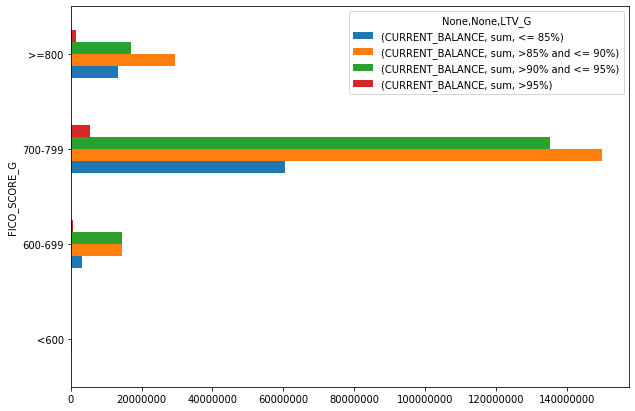

In [9]:
fico_score.plot.barh()
plt.ticklabel_format(style='plain', axis='x')
plt.rcParams["figure.figsize"]=10,7
plt.show()